In [808]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [809]:
df = pd.read_csv('/content/UFATI Data - Sales Responses (1).csv')

In [810]:
print(df.head().to_string())

    Reg_no            Timestamp    Sales Rep Name Student's First Name Students Middle Name Student's Last Name Students ID Number Students ID Number Remarks  Student Telephone Contact  Student Alternative Telephone Contact Students E-mail address. County Sub-County Location Area of residence Nationality  Gender Year of Birth Month of Birth Day of Birth Height (cm) Weight (Kg) Blood Group Highest level of education Primary/High School Grade Religion Do you drive? Marital Status Number of children Are you currently working? Next of kin Name  Next of kin Contact                        Class registering for How did you learn about us?                                                         Paste the M-pesa message below. M-pesa Code Date of payment Amount Paid Comment Unnamed: 39 Unnamed: 40  Unnamed: 41  Unnamed: 42                Full Name                        Class_id    Year   Branch Month of Registration Class Start Date Class Start Month  Class Start Year Registration Date
0  22-1

In [811]:
df.shape

(4897, 52)

### Check for Null values

In [812]:
df.isnull().sum()

,0
Reg_no,1
Timestamp,374
Sales Rep Name,369
Student's First Name,368
Students Middle Name,1196
Student's Last Name,378
Students ID Number,1408
Students ID Number Remarks,368
Student Telephone Contact,368
Student Alternative Telephone Contact,1297


In [813]:
for i in range(4898, 4530, -1):
    if i in df.index:
        df.drop(i, inplace=True)

In [814]:
df.isnull().sum()

,0
Reg_no,1
Timestamp,8
Sales Rep Name,3
Student's First Name,2
Students Middle Name,830
Student's Last Name,12
Students ID Number,1042
Students ID Number Remarks,2
Student Telephone Contact,2
Student Alternative Telephone Contact,931


In [815]:
df.columns

Index(['Reg_no', 'Timestamp', 'Sales Rep Name', 'Student's First Name',
       'Students Middle Name', 'Student's Last Name', 'Students ID Number',
       'Students ID Number Remarks', 'Student Telephone Contact',
       'Student Alternative Telephone Contact', 'Students E-mail address.',
       'County', 'Sub-County', 'Location', 'Area of residence', 'Nationality',
       'Gender', 'Year of Birth', 'Month of Birth', 'Day of Birth',
       'Height (cm)', 'Weight (Kg)', 'Blood Group',
       'Highest level of education', 'Primary/High School Grade', 'Religion',
       'Do you drive?', 'Marital Status', 'Number of children',
       'Are you currently working?', 'Next of kin Name', 'Next of kin Contact',
       'Class registering for', 'How did you learn about us?',
       'Paste the M-pesa message below.', 'M-pesa Code', 'Date of payment',
       'Amount Paid', 'Comment', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Full Name', 'Class_id', 'Year', 'Branch',
       

## Drop personal details

In [816]:
df1 = df.drop(columns=["Student's First Name",'Students Middle Name', "Student's Last Name",
                       'Students ID Number','Students ID Number Remarks', 'Student Telephone Contact',
                       'Student Alternative Telephone Contact', "Students E-mail address.",'Next of kin Name',
                       'Next of kin Contact','Paste the M-pesa message below.', 'M-pesa Code',
                       'Date of payment', 'Comment', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
                       'Unnamed: 42', 'Full Name','Amount Paid','Day of Birth','Month of Birth',
                       'Blood Group','Registration Date','Year'])

In [817]:
df1.shape

(4531, 27)

## Impute the Missing Values

In [818]:
df1['Religion'].fillna('Christianity', inplace=True)
df1['Are you currently working?'].fillna("No", inplace=True)
df1['Nationality'].fillna('Kenya', inplace=True)
df1['Marital Status'].fillna('Single', inplace=True)
df1['Number of children'].fillna(0, inplace=True)
df1['Do you drive?'].fillna('No', inplace=True)

## Clean Class Start Month column

In [819]:
import re
def extract_month(text):
    if pd.isna(text):
        return None
    match = re.search(r'\((\w+)', text)
    if match:
        return match.group(1)
    return None
df1['Extracted Month'] = df1['Class registering for'].apply(extract_month)
df1['Class Start Month'] = df1['Class Start Month'].fillna(df1['Extracted Month'])
df1.drop(columns=['Extracted Month'], inplace=True)
df1['Class Start Month'].replace({'2025': 'January', '#VALUE!': 'March'}, inplace=True)
df1['Class Start Month'].fillna('January', inplace=True)

## Clean Branch Column

In [820]:
def extract_branch(class_id):
    if pd.isna(class_id):
        return None
    return class_id.split('_')[-1]
df1['Extracted Branch'] = df1['Class_id'].apply(extract_branch)
df1['Branch'] = df1['Branch'].fillna(df1['Extracted Branch'])
df1.drop(columns=['Extracted Branch'], inplace=True)
df1['Branch'].fillna('Nairobi', inplace=True)
df1['Branch'].replace({'Coding for Kids': 'Nairobi', 'Dimentia Course-Alumni': 'Nairobi'}, inplace=True)

In [821]:
df1['Branch'].unique()

array(['Nairobi', 'Eldoret', 'Mombasa', 'Nakuru'], dtype=object)

In [822]:
df1.isnull().sum()

,0
Reg_no,1
Timestamp,8
Sales Rep Name,3
County,3
Sub-County,4
Location,3
Area of residence,3
Nationality,0
Gender,2
Year of Birth,4


In [823]:
df1.dropna(inplace=True)

In [824]:
df1.drop(columns=['Reg_no','Class registering for','Timestamp'],inplace=True)

In [825]:
df1.columns

Index(['Sales Rep Name', 'County', 'Sub-County', 'Location',
       'Area of residence', 'Nationality', 'Gender', 'Year of Birth',
       'Height (cm)', 'Weight (Kg)', 'Highest level of education',
       'Primary/High School Grade', 'Religion', 'Do you drive?',
       'Marital Status', 'Number of children', 'Are you currently working?',
       'How did you learn about us?', 'Class_id', 'Branch',
       'Month of Registration', 'Class Start Date', 'Class Start Month',
       'Class Start Year'],
      dtype='object')

In [826]:
df2 = df1.copy()

## **Exploratory Data Analysis**

In [827]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4302 entries, 0 to 4386
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sales Rep Name               4302 non-null   object 
 1   County                       4302 non-null   object 
 2   Sub-County                   4302 non-null   object 
 3   Location                     4302 non-null   object 
 4   Area of residence            4302 non-null   object 
 5   Nationality                  4302 non-null   object 
 6   Gender                       4302 non-null   object 
 7   Year of Birth                4302 non-null   object 
 8   Height (cm)                  4302 non-null   object 
 9   Weight (Kg)                  4302 non-null   object 
 10  Highest level of education   4302 non-null   object 
 11  Primary/High School Grade    4302 non-null   object 
 12  Religion                     4302 non-null   object 
 13  Do you drive?          

In [828]:
df2['Height (cm)'].replace("Null", 0, inplace=True)
df2['Weight (Kg)'].replace('Null',0, inplace=True)
df2['Height (cm)'] = df2['Height (cm)'].astype(int)
df2['Weight (Kg)'] = df2['Weight (Kg)'].astype(int)

In [829]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Height (cm),4302.0,111.526499,75.200775,0.0,0.0,156.0,165.0,220.0
Weight (Kg),4302.0,45.294282,32.167862,0.0,0.0,58.0,68.0,163.0
Class Start Year,4302.0,2023.908647,0.782733,2023.0,2023.0,2024.0,2025.0,2025.0


In [830]:
df2["Class Start Year"].value_counts()

,count
Class Start Year,
2024.0,1631
2023.0,1532
2025.0,1139


In [831]:
df3 =df2[df2['Class Start Year'].isin([2024,2025])]

In [832]:
df3.shape

(2770, 24)

In [833]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Height (cm),2770.0,161.215884,14.229544,0.0,156.0,161.0,168.0,220.0
Weight (Kg),2770.0,65.305776,13.520927,0.0,56.0,64.0,72.0,163.0
Class Start Year,2770.0,2024.411191,0.492139,2024.0,2024.0,2024.0,2025.0,2025.0


In [834]:
categorical_cols = [
    'Sales Rep Name', 'County', 'Sub-County', 'Location', 'Area of residence',
    'Nationality', 'Gender', 'Highest level of education', 'Religion',
    'Do you drive?', 'Marital Status', 'Are you currently working?',
    'How did you learn about us?', 'Class_id', 'Branch',
    'Month of Registration', 'Class Start Month'
]

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df3[col].value_counts())



Sales Rep Name value counts:
Sales Rep Name
Phyllis Muriuki       724
Clemence Cherera      499
James Temba           466
Daisy Nduta           209
Jack Reagan           190
Valentine Asirigwa    175
Kelly Kaptum          114
Habby Otieno           80
Winnie Ojienda         71
Joan Jepchumba         35
Vivianne Lumasia       31
Nelly Chepkemoi        31
Joan Cherono           24
Stephen Johnes         21
Isaac Ndichu           20
Patience Sosi          20
Nancy Okare            18
Alex Kiprotich         11
Joylene Cokide          9
Ted Muiruri             8
Carolyne Muturi         8
Graham Muriuki          3
Joshua Wachira          2
Berly Atieno            1
Name: count, dtype: int64

County value counts:
County
Nairobi            898
Mombasa            444
Kiambu             416
Uasin Gishu        313
Nakuru             191
Kajiado             75
Kilifi              56
Machakos            53
Nandi               40
Kwale               38
Trans Nzoia         32
Kakamega            28


In [835]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770 entries, 604 to 4386
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sales Rep Name               2770 non-null   object 
 1   County                       2770 non-null   object 
 2   Sub-County                   2770 non-null   object 
 3   Location                     2770 non-null   object 
 4   Area of residence            2770 non-null   object 
 5   Nationality                  2770 non-null   object 
 6   Gender                       2770 non-null   object 
 7   Year of Birth                2770 non-null   object 
 8   Height (cm)                  2770 non-null   int64  
 9   Weight (Kg)                  2770 non-null   int64  
 10  Highest level of education   2770 non-null   object 
 11  Primary/High School Grade    2770 non-null   object 
 12  Religion                     2770 non-null   object 
 13  Do you drive?        

In [836]:
df3['Year of Birth'].replace('Null', 1999, inplace=True)
df3['Class Start Year'].replace('Null', 0, inplace=True)

In [837]:
df3['Year of Birth'] = df3['Year of Birth'].astype(int)
df3['Class Start Year'] = df3['Class Start Year'].astype(int)

In [838]:
replace_dict = {
    'NONE': '0',
    'none': '0',
    'no': '0',
    'One': '1',
    0: '0',
    1: '1',
    '30': '3'
}
df3['Number of children'].replace(replace_dict, inplace=True)

In [839]:
df3['Number of children'] = df3['Number of children'].astype(int)

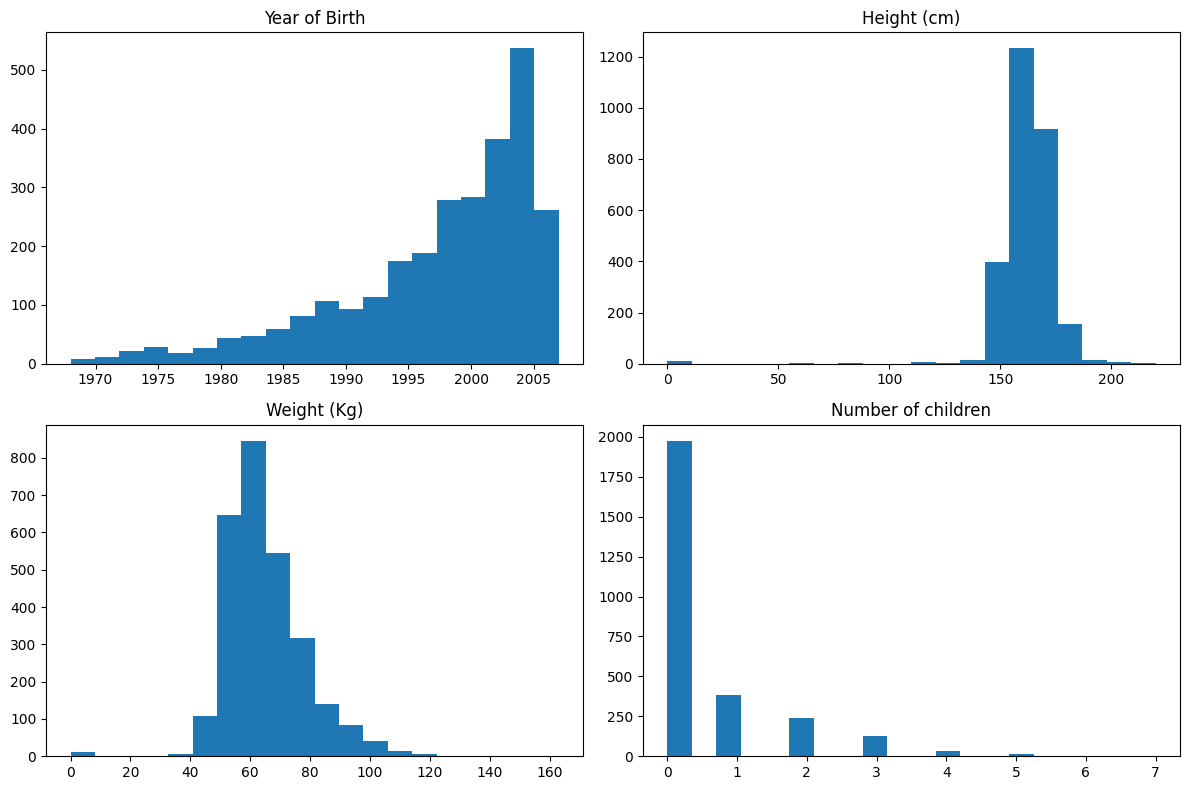

In [840]:
numerical_cols = ['Year of Birth', 'Height (cm)', 'Weight (Kg)', 'Number of children']

df3[numerical_cols].hist(bins=20, figsize=(12, 8), grid=False)
plt.tight_layout()
plt.show()


## Correlation Analysis

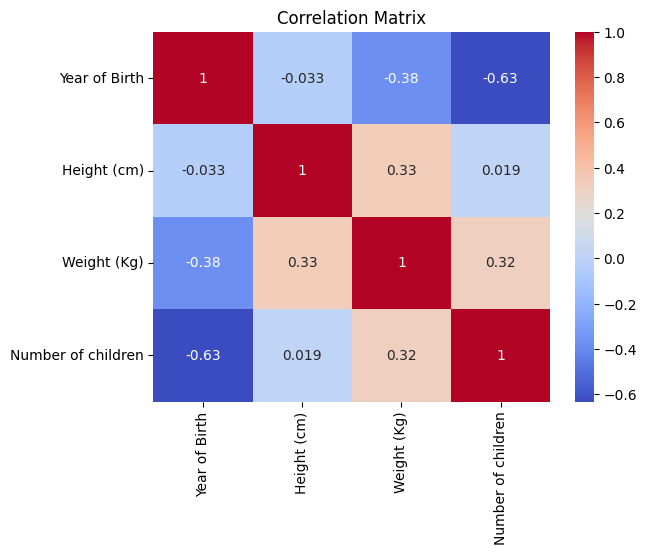

In [841]:
sns.heatmap(df3[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


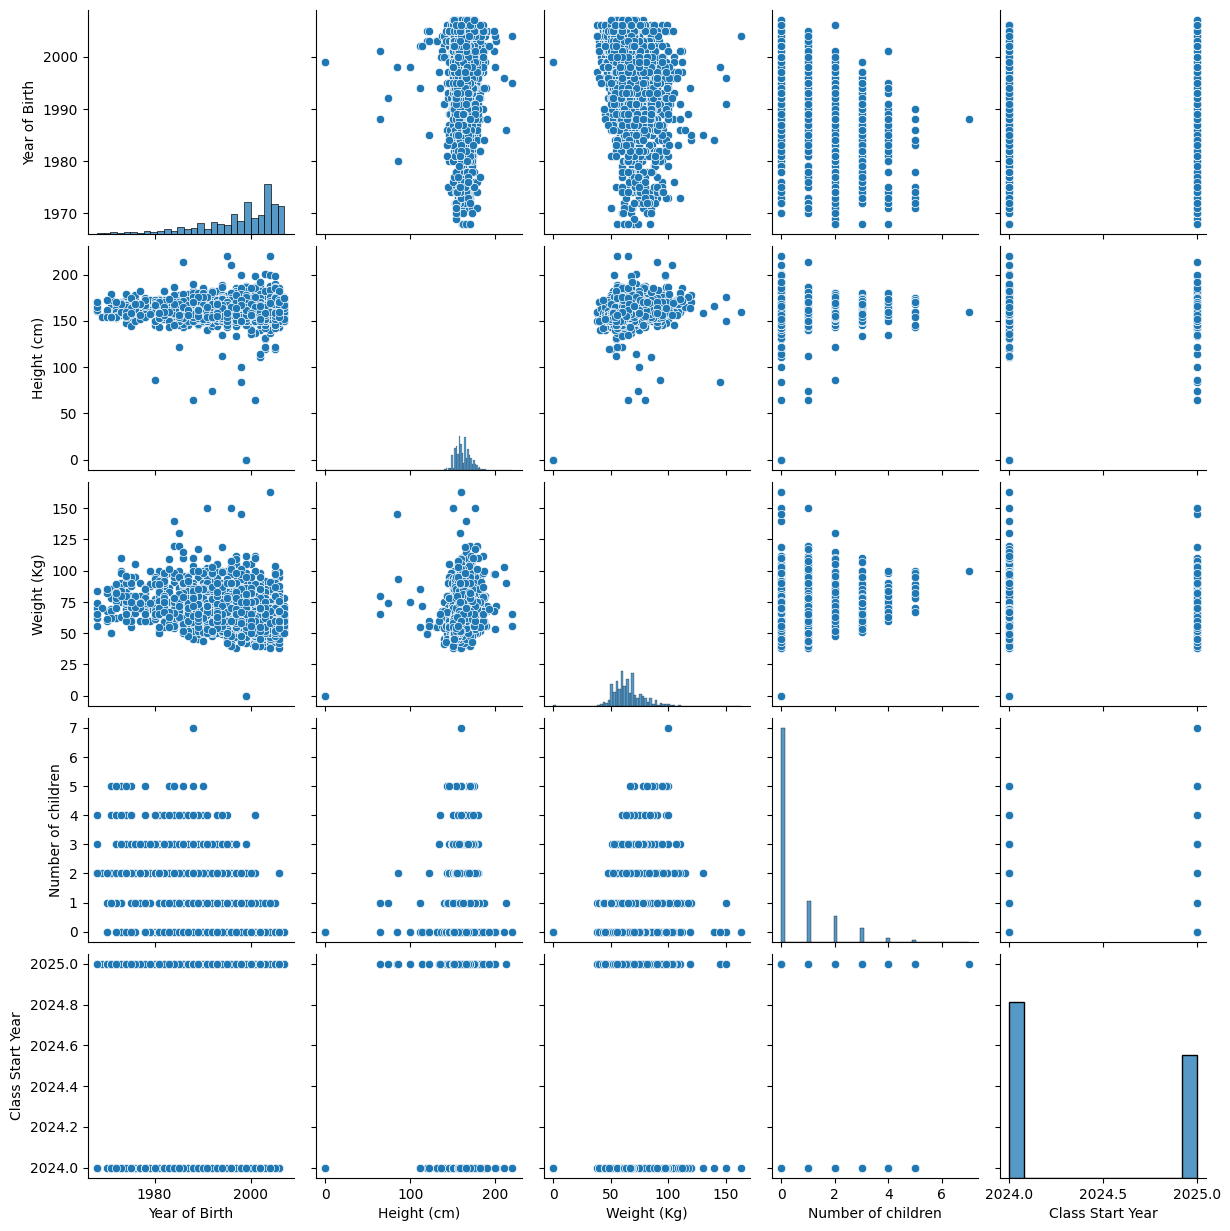

In [842]:
# %%
# sns.pairplot(penguins, hue="species", markers=["o", "s", "D"])
sns.pairplot(df3, markers=["o", "s", "D"]) # Replace penguins with df3

### Registrations per Class Start Month

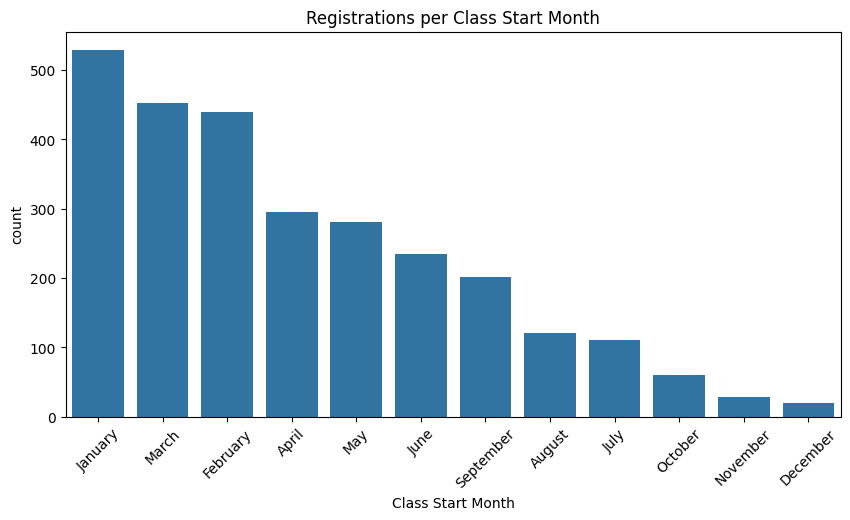

In [843]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Class Start Month', data=df3, order=df3['Class Start Month'].value_counts().index)
plt.title("Registrations per Class Start Month")
plt.xticks(rotation=45)
plt.show()


### Weight Distribution by Gender

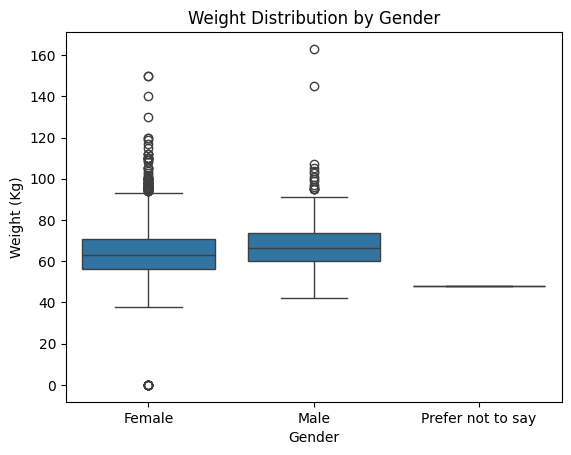

In [844]:
sns.boxplot(x='Gender', y='Weight (Kg)', data=df3)
plt.title("Weight Distribution by Gender")
plt.show()


In [845]:
df3['Location'].value_counts()

,count
Location,
Bamburi,81
Kangemi,51
Kasarani,43
Kikuyu,39
Kawangware,37
...,...
Ngoingwa,1
Nyakio,1
Kadzandani,1


In [846]:
null_mask = df3['Location'] == 'Null'
null_indices = df3[null_mask].index
shuffled = np.random.permutation(null_indices)
n = len(shuffled)
split1 = shuffled[:n//3]
split2 = shuffled[n//3:2*n//3]
split3 = shuffled[2*n//3:]
df3.loc[split1, 'Location'] = 'Kangemi'
df3.loc[split2, 'Location'] = 'Kikuyu'
df3.loc[split3, 'Location'] = 'Bamburi'

In [847]:
df3['Location'].value_counts()

,count
Location,
Bamburi,85
Kangemi,54
Kikuyu,43
Kasarani,43
Kawangware,37
...,...
Kajwang,1
Ngoingwa,1
Nyakio,1


### Registrations by County

In [848]:
county_counts = df3['County'].value_counts()
print(county_counts)

County
Nairobi            898
Mombasa            444
Kiambu             416
Uasin Gishu        313
Nakuru             191
Kajiado             75
Kilifi              56
Machakos            53
Nandi               40
Kwale               38
Trans Nzoia         32
Kakamega            28
Murang'a            18
Bungoma             16
Kirinyaga           13
Baringo             12
Null                11
Elgeyo/Marakwet     11
Kericho             11
Bomet                9
Busia                9
Narok                9
Meru                 8
Kisii                8
Nyamira              6
Vihiga               6
Nyandarua            5
Laikipia             5
Elgeyo Marakwet      4
Kisumu               3
Siaya                3
Mandera              2
Taita Taveta         2
Nyeri                2
Tharaka Nithi        2
Homa Bay             2
Migori               2
West Pokot           2
Tana River           1
Garissa              1
Embu                 1
Kitui                1
Tharaka-Nithi        1
Name

### Average Height & Weight by Gender

In [849]:
print(df3.groupby('Gender')[['Height (cm)', 'Weight (Kg)']].mean())

                   Height (cm)  Weight (Kg)
Gender                                     
Female              160.057094    64.854282
Male                167.682464    67.857820
Prefer not to say   152.000000    48.000000


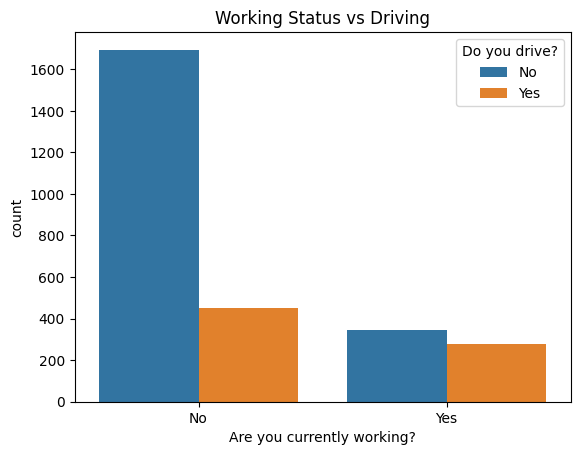

In [850]:
sns.countplot(x='Are you currently working?', hue='Do you drive?', data=df3)
plt.title("Working Status vs Driving")
plt.show()


### Gender Distribution by Branch

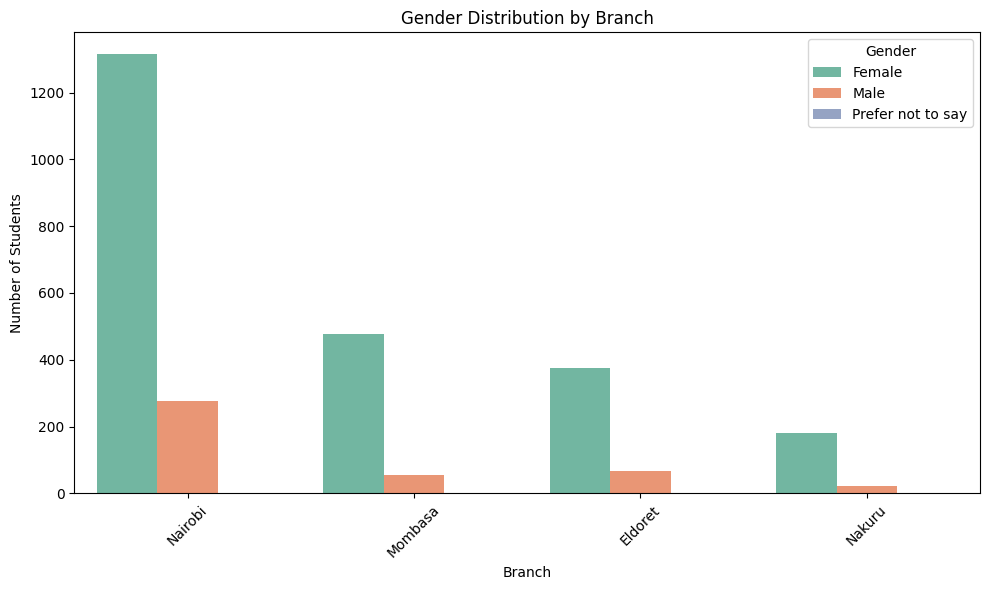

In [851]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='Branch', hue='Gender', palette='Set2')
plt.title('Gender Distribution by Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


### Driving Status vs Current Employment

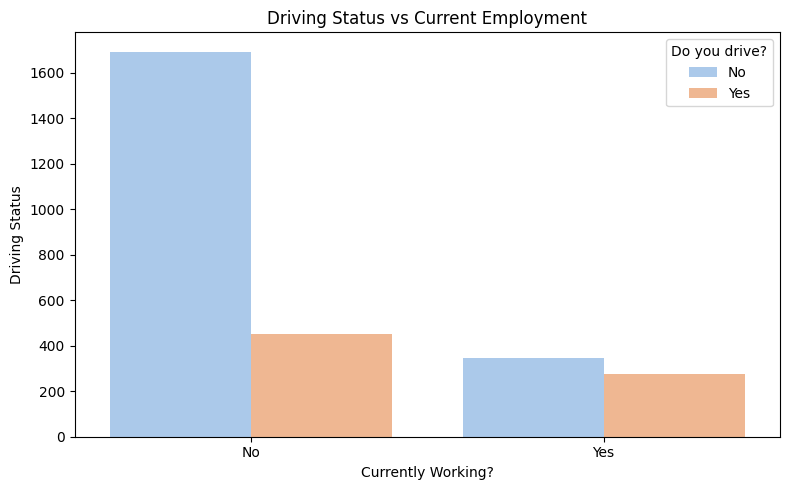

In [852]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df3, x='Are you currently working?', hue='Do you drive?', palette='pastel')
plt.title('Driving Status vs Current Employment')
plt.xlabel('Currently Working?')
plt.ylabel('Driving Status')
plt.legend(title='Do you drive?')
plt.tight_layout()
plt.show()


### Year of Birth by Education Level

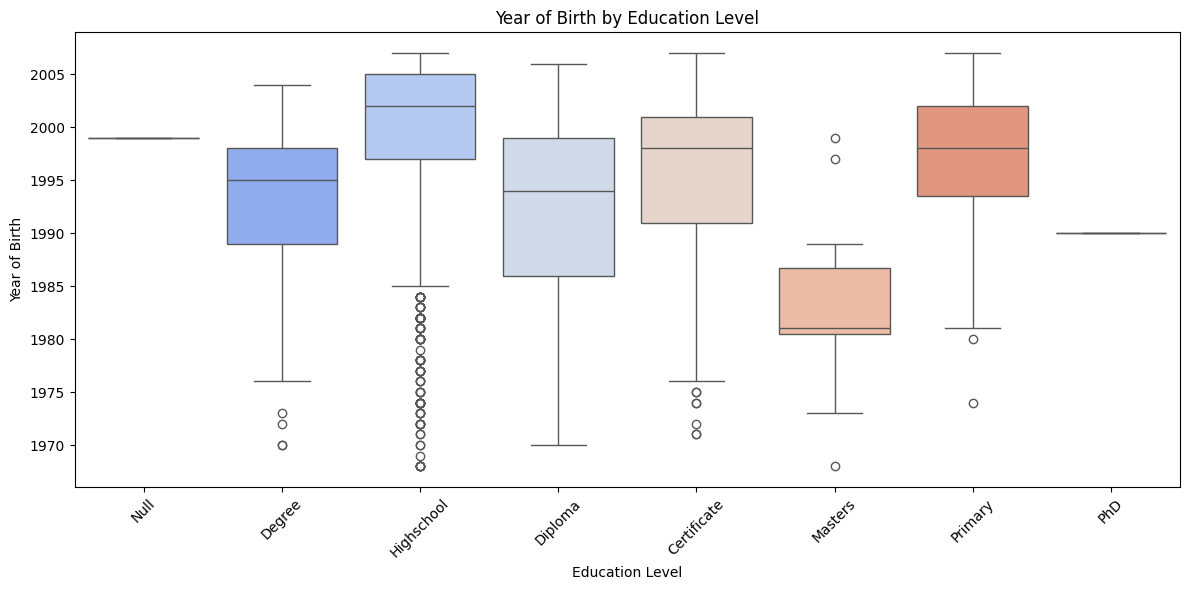

In [853]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='Highest level of education', y='Year of Birth', palette='coolwarm')
plt.title('Year of Birth by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Year of Birth')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Number of Children by Marital Status

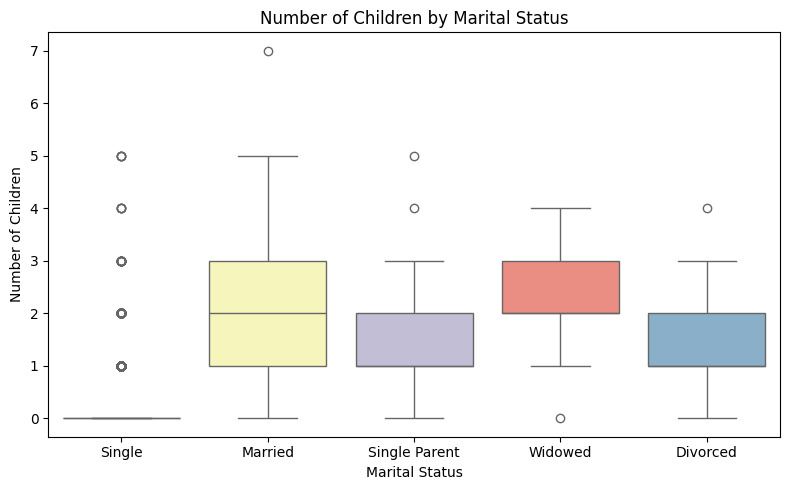

In [854]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df3, x='Marital Status', y='Number of children', palette='Set3')
plt.title('Number of Children by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Children')
plt.tight_layout()
plt.show()


In [855]:
df3['Year of Birth'].replace(0,2000, inplace=True)

In [856]:
print(df3['Year of Birth'].dtype)

int64


In [857]:
df3['Age'] = 2025 - df3['Year of Birth']

In [858]:
df3['Age'].value_counts()

,count
Age,
20,281
21,256
19,231
22,205
23,178
26,161
24,149
25,135
27,118


In [859]:
df3['Age'].describe()

,Age
count,2770.000000
mean,27.332491
std,8.104428
min,18.000000
25%,21.000000
50%,25.000000
75%,31.000000
max,57.000000


### Define age bins and labels

In [860]:
bins = [17, 24, 34, 44, 54, 65]
labels = ['18–24', '25–34', '35–44', '45–54', '55–60']
df3['Age Group'] = pd.cut(df3['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

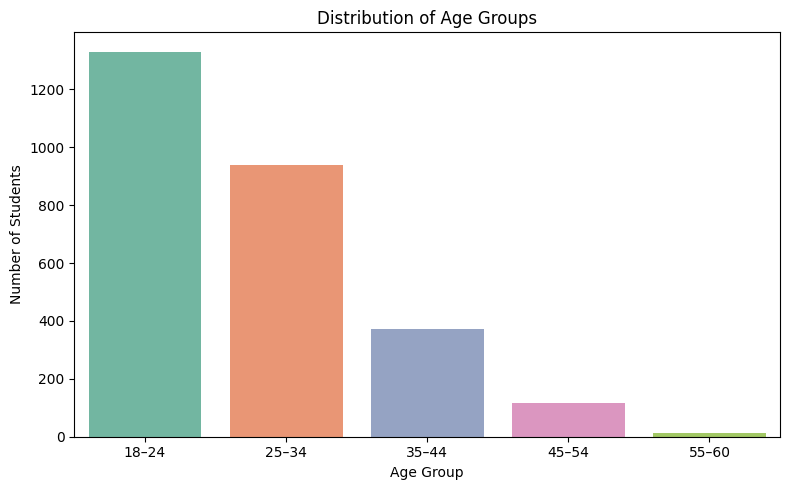

In [861]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df3, x='Age Group', palette='Set2', order=labels)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()


In [862]:
df3.columns

Index(['Sales Rep Name', 'County', 'Sub-County', 'Location',
       'Area of residence', 'Nationality', 'Gender', 'Year of Birth',
       'Height (cm)', 'Weight (Kg)', 'Highest level of education',
       'Primary/High School Grade', 'Religion', 'Do you drive?',
       'Marital Status', 'Number of children', 'Are you currently working?',
       'How did you learn about us?', 'Class_id', 'Branch',
       'Month of Registration', 'Class Start Date', 'Class Start Month',
       'Class Start Year', 'Age', 'Age Group'],
      dtype='object')

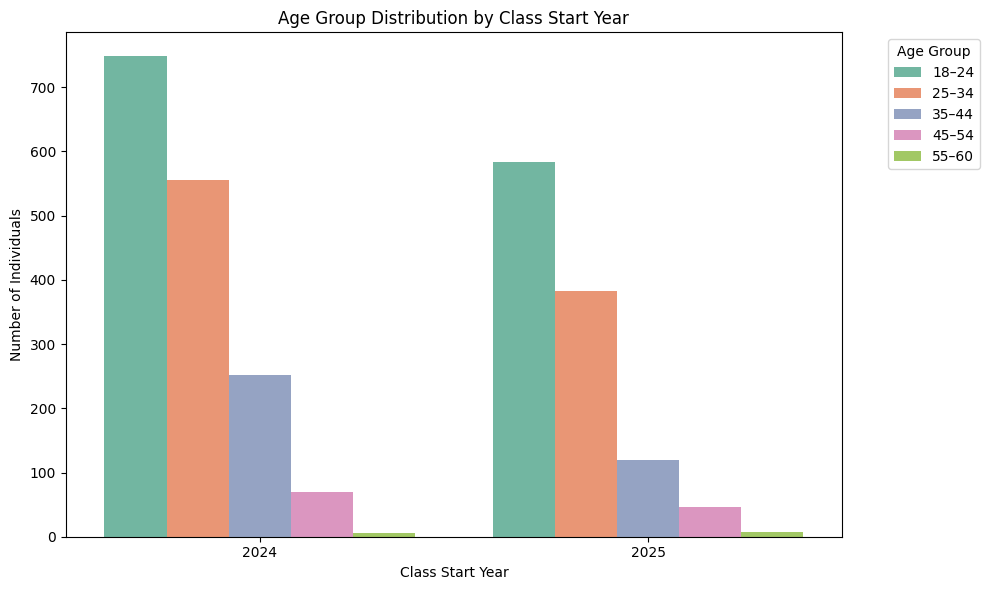

In [863]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='Class Start Year', hue='Age Group', palette='Set2')
plt.title('Age Group Distribution by Class Start Year')
plt.xlabel('Class Start Year')
plt.ylabel('Number of Individuals')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Stacked Bar Chart: Age Groups per Branch & Class Start Year

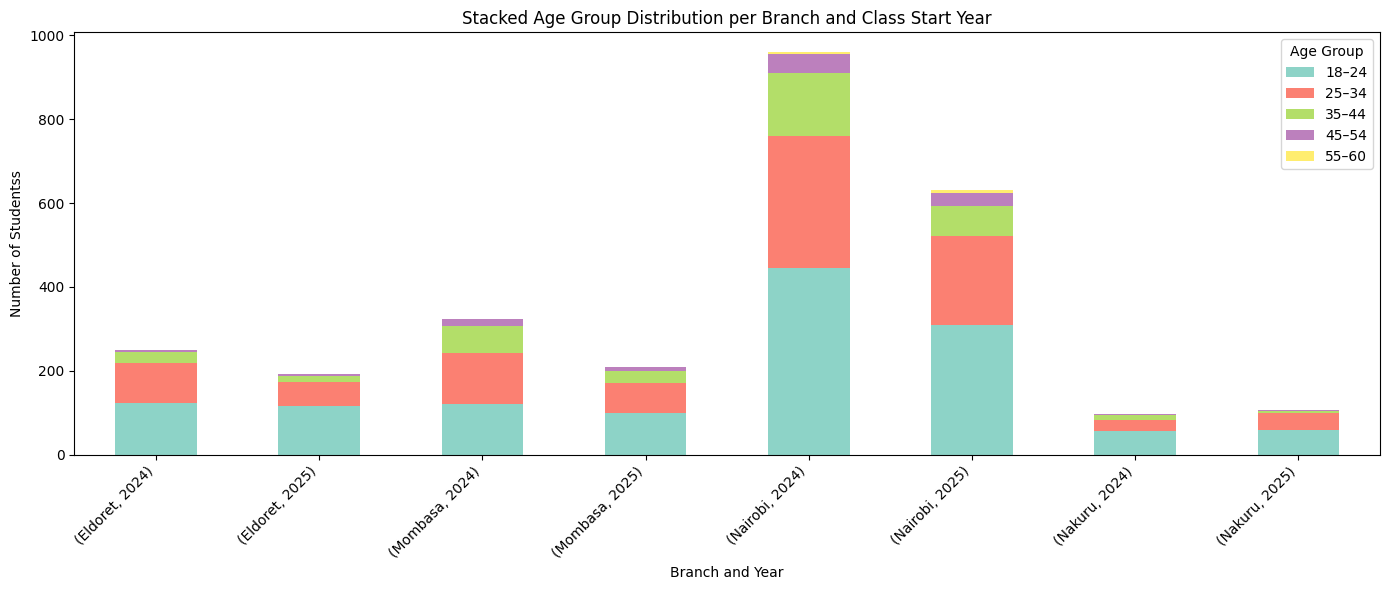

In [864]:
grouped = df3.groupby(['Branch', 'Class Start Year', 'Age Group']).size().reset_index(name='Count')
pivot_table = grouped.pivot_table(index=['Branch', 'Class Start Year'], columns='Age Group', values='Count', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set3')
plt.title("Stacked Age Group Distribution per Branch and Class Start Year")
plt.xlabel("Branch and Year")
plt.ylabel("Number of Studentss")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

###  Line Chart: Age Group Trends per Class Start Month


In [865]:
monthly = df3.groupby(['Class Start Month', 'Age Group']).size().reset_index(name='Count')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly['Class Start Month'] = pd.Categorical(monthly['Class Start Month'], categories=month_order, ordered=True)
monthly = monthly.sort_values('Class Start Month')

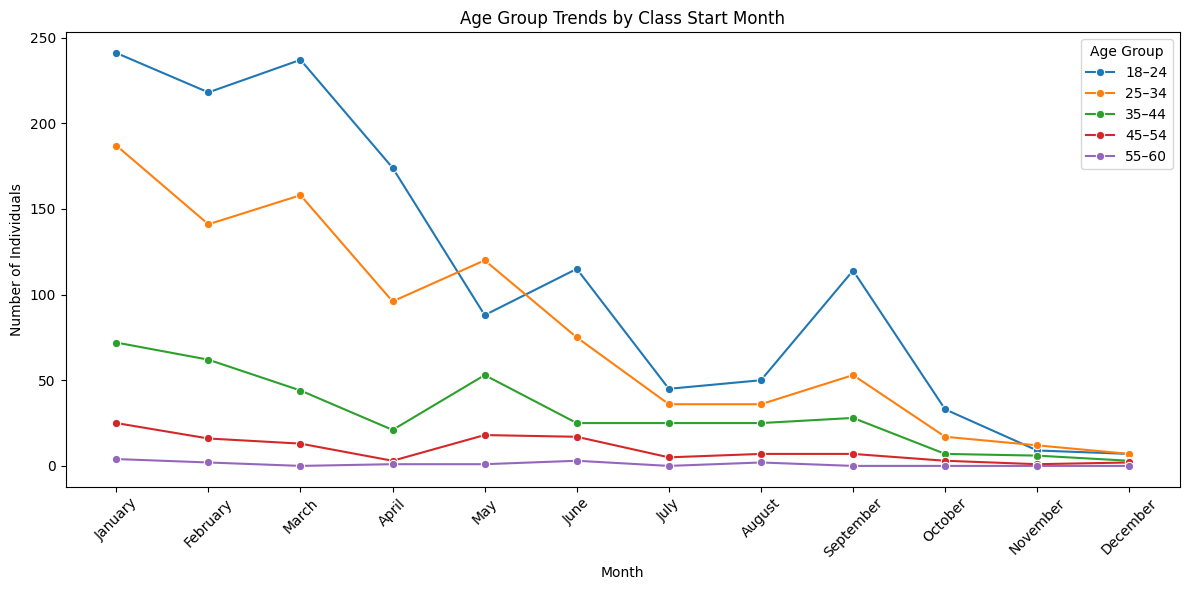

In [866]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly, x='Class Start Month', y='Count', hue='Age Group', marker='o')
plt.title("Age Group Trends by Class Start Month")
plt.xlabel("Month")
plt.ylabel("Number of Individuals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Stacked Bar Chart by Gender and Branch

In [867]:
gender_branch = df3.groupby(['Branch', 'Gender', 'Age Group']).size().reset_index(name='Count')
pivot_gender_branch = gender_branch.pivot_table(index=['Branch', 'Gender'], columns='Age Group', values='Count', fill_value=0)

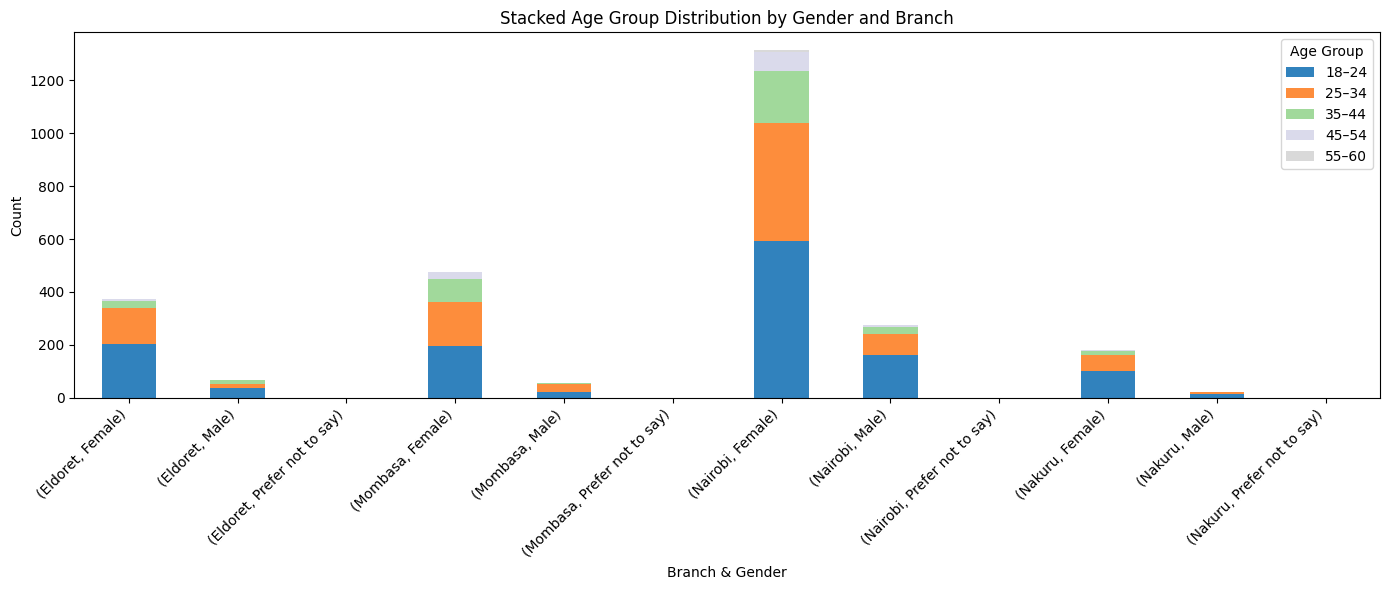

In [868]:
pivot_gender_branch.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20c')
plt.title("Stacked Age Group Distribution by Gender and Branch")
plt.xlabel("Branch & Gender")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

## **Modeling**

#### Create your label: high vs low registration area/month

In [869]:
df3_grouped = df3.groupby(['County', 'Month of Registration']).size().reset_index(name='Registrations')
threshold = df3_grouped['Registrations'].quantile(0.7)
df3_grouped['High_Registration'] = (df3_grouped['Registrations'] >= threshold).astype(int)
df3 = pd.merge(df3, df3_grouped[['County', 'Month of Registration', 'High_Registration']],
               on=['County', 'Month of Registration'], how='left')


# Encode using LabelEncoder

In [870]:
df3.columns

Index(['Sales Rep Name', 'County', 'Sub-County', 'Location',
       'Area of residence', 'Nationality', 'Gender', 'Year of Birth',
       'Height (cm)', 'Weight (Kg)', 'Highest level of education',
       'Primary/High School Grade', 'Religion', 'Do you drive?',
       'Marital Status', 'Number of children', 'Are you currently working?',
       'How did you learn about us?', 'Class_id', 'Branch',
       'Month of Registration', 'Class Start Date', 'Class Start Month',
       'Class Start Year', 'Age', 'Age Group', 'High_Registration'],
      dtype='object')

In [871]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['County', 'Sales Rep Name', 'Sub-County', 'Location', 'Area of residence', 'Nationality',
            'Gender', 'Highest level of education', 'Primary/High School Grade',
            'Religion', 'Do you drive?', 'Marital Status', 'Are you currently working?',
            'How did you learn about us?', 'Branch', 'Class Start Month',
            'Age Group', 'Month of Registration', 'High_Registration']

encoders = {}

# Apply label encoding per column
for col in cat_cols:
    if col in df3.columns:
        le = LabelEncoder()
        df3[col] = le.fit_transform(df3[col])
        encoders[col] = le  # Save this encoder
    else:
        print(f"Warning: Column '{col}' not found in df3. Skipping.")


### Split into train and test sets

In [872]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cols_to_drop = ['High_Registration', 'Class_id', 'Class Start Date']
X = df3.drop(columns=[col for col in cols_to_drop if col in df3.columns])
y = df3['High_Registration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Classifier

In [873]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Classifier")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Classifier
[[ 31  33]
 [  4 486]]
              precision    recall  f1-score   support

           0       0.89      0.48      0.63        64
           1       0.94      0.99      0.96       490

    accuracy                           0.93       554
   macro avg       0.91      0.74      0.79       554
weighted avg       0.93      0.93      0.92       554

Accuracy: 0.9332129963898917


### XGBoost Classifier

In [874]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Classifier")
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print("Accuracy:", accuracy_score(y_test, xgb_pred))


XGBoost Classifier
[[ 59   5]
 [  6 484]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        64
           1       0.99      0.99      0.99       490

    accuracy                           0.98       554
   macro avg       0.95      0.95      0.95       554
weighted avg       0.98      0.98      0.98       554

Accuracy: 0.98014440433213


### Gradient Boosting Classifier

In [875]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Classifier")
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))
print("Accuracy:", accuracy_score(y_test, gb_pred))


Gradient Boosting Classifier
[[ 54  10]
 [ 11 479]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        64
           1       0.98      0.98      0.98       490

    accuracy                           0.96       554
   macro avg       0.91      0.91      0.91       554
weighted avg       0.96      0.96      0.96       554

Accuracy: 0.9620938628158845


### Logistic Regression

In [876]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Logistic Regression benefits from feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)

print("Logistic Regression")
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))
print("Accuracy:", accuracy_score(y_test, log_pred))


Logistic Regression
[[ 14  50]
 [  3 487]]
              precision    recall  f1-score   support

           0       0.82      0.22      0.35        64
           1       0.91      0.99      0.95       490

    accuracy                           0.90       554
   macro avg       0.87      0.61      0.65       554
weighted avg       0.90      0.90      0.88       554

Accuracy: 0.9043321299638989


### Performance Summary

In [877]:
results = {
    "Model": ["Random Forest", "XGBoost", "Gradient Boosting", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, xgb_pred),
        accuracy_score(y_test, gb_pred),
        accuracy_score(y_test, log_pred),
    ]
}

summary_df = pd.DataFrame(results)
print(summary_df.sort_values(by="Accuracy", ascending=False))


                 Model  Accuracy
1              XGBoost  0.980144
2    Gradient Boosting  0.962094
0        Random Forest  0.933213
3  Logistic Regression  0.904332


## **Observation**


*   XGBoost is the best performing Classifier



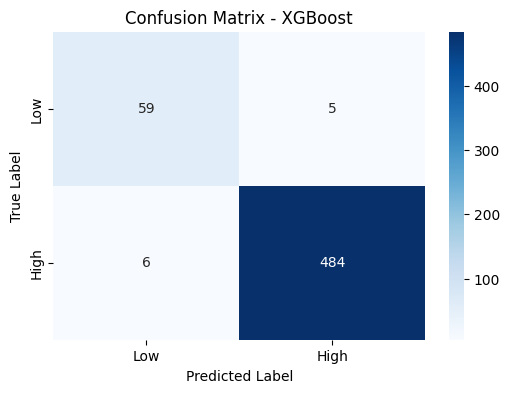

In [878]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
xgb_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()


### Compute ROC curve and AUC

In [879]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]  # probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, xgb_proba)
roc_auc = auc(fpr, tpr)

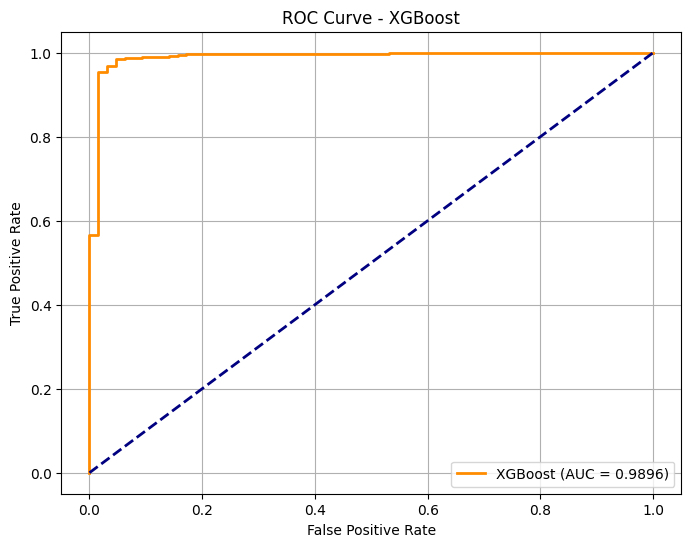

In [880]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Get feature importance scores

In [881]:
importances = xgb_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False).head(20)

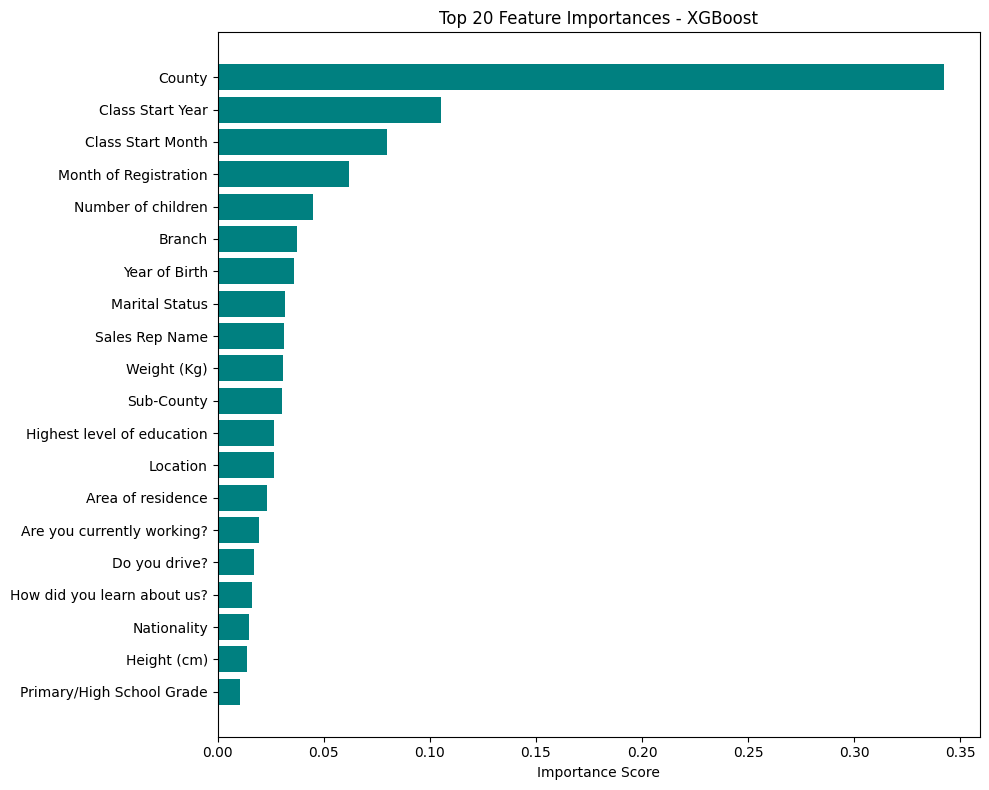

In [882]:
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='teal')
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


### Log_Loss

In [883]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, xgb_proba)
print(f"Log Loss (XGBoost): {logloss:.5f}")


Log Loss (XGBoost): 0.06310


#### **A log loss of 0.06285 is very low, which means**;

*   The model is making very accurate predictions.

*   It’s not just classifying correctly, but giving well-calibrated probabilities close to 1 for the correct class and close to 0 for the incorrect class.

*   There are few confident misclassifications.





### Cross-validation

In [884]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
xgb_cv_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cv_scores = cross_val_score(xgb_cv_model, X, y, cv=5, scoring='accuracy')

In [885]:
print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Accuracy Scores: [0.94765343 0.91516245 0.90794224 0.96570397 0.96028881]
Mean CV Accuracy: 0.9394
Standard Deviation: 0.0236


In [886]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Train-test split
X = df3.drop(['High_Registration', 'Class_id', 'Class Start Date'], axis=1)
y = df3['High_Registration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 3: Make predictions
xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]  # probability of class 1


In [887]:
df3.columns

Index(['Sales Rep Name', 'County', 'Sub-County', 'Location',
       'Area of residence', 'Nationality', 'Gender', 'Year of Birth',
       'Height (cm)', 'Weight (Kg)', 'Highest level of education',
       'Primary/High School Grade', 'Religion', 'Do you drive?',
       'Marital Status', 'Number of children', 'Are you currently working?',
       'How did you learn about us?', 'Class_id', 'Branch',
       'Month of Registration', 'Class Start Date', 'Class Start Month',
       'Class Start Year', 'Age', 'Age Group', 'High_Registration'],
      dtype='object')

In [888]:
# Add predicted probabilities and labels to X_test
X_test_copy = X_test.copy()
X_test_copy['Predicted_Prob'] = xgb_proba
X_test_copy['True_Label'] = y_test.values

# Add back Location and Month from the original dataframe
X_test_copy['Location'] = df3.loc[X_test.index, 'Location']
X_test_copy['Month'] = df3.loc[X_test.index, 'Month of Registration']


In [889]:
# Group by Location and Month
location_month_targets = X_test_copy.groupby(['Location', 'Month']).agg(
    Avg_Pred_Prob=('Predicted_Prob', 'mean'),
    High_Registrations=('True_Label', 'sum'),
    Total_Registrations=('True_Label', 'count')
).reset_index()

# Calculate percentage of high registrations
location_month_targets['% High Registrations'] = 100 * location_month_targets['High_Registrations'] / location_month_targets['Total_Registrations']

# Sort by predicted probability
top_location_month_targets = location_month_targets.sort_values(by='Avg_Pred_Prob', ascending=False)

top_location_month_targets.to_excel("Top_Location_Month_Targets.xlsx", index=False)


## Save the XGBoost model

In [890]:
import pickle


with open("xgb_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)
